**1. Implanting K-means clustering algorithm**



In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
df = pd.read_csv('cluster_data1.csv')

# Z-score method(Standardize the data)
def standardize_data(df):
    return (df - df.mean()) / df.std()

df_standardized = standardize_data(df)

In [3]:
df_standardized

,X1,X2,X3,X4
0,1.034539,-0.124540,0.703536,0.656917
1,0.551486,-0.355171,1.043591,0.787951
2,-0.293857,-0.124540,0.420157,0.394849
3,2.121409,-0.124540,1.610349,1.181053
4,0.189196,0.797981,0.420157,0.525883
...,...,...,...,...
145,-0.535384,1.951133,-1.393470,-1.046525
146,-0.656147,1.489872,-1.280118,-1.308593
147,0.309959,-1.047062,1.043591,0.263815
148,-0.173094,1.720502,-1.166767,-1.177559


In [4]:
# Set seed=123, Number of clusters=3
np.random.seed(123)
K = 3

In [5]:
# Initialize centroids randomly
centroids = df_standardized.sample(n=K).to_numpy()

# Calculate Euclidean distance
def euclidean_distance(data_point1, data_point2):
    return np.sqrt(np.sum((data_point1 - data_point2) ** 2))

# Assign each data point to the nearest centroid
def nearest_clusters_assignment(data, centroids):
    clusters = []
    for i in range(len(data)):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Recompute centroids as the mean of the assigned points
def update_centroids(data, clusters, K):
    new_centroids = np.zeros((K, data.shape[1]))
    for k in range(K):
        new_centroids[k, :] = data[clusters == k].mean(axis=0)
    return new_centroids


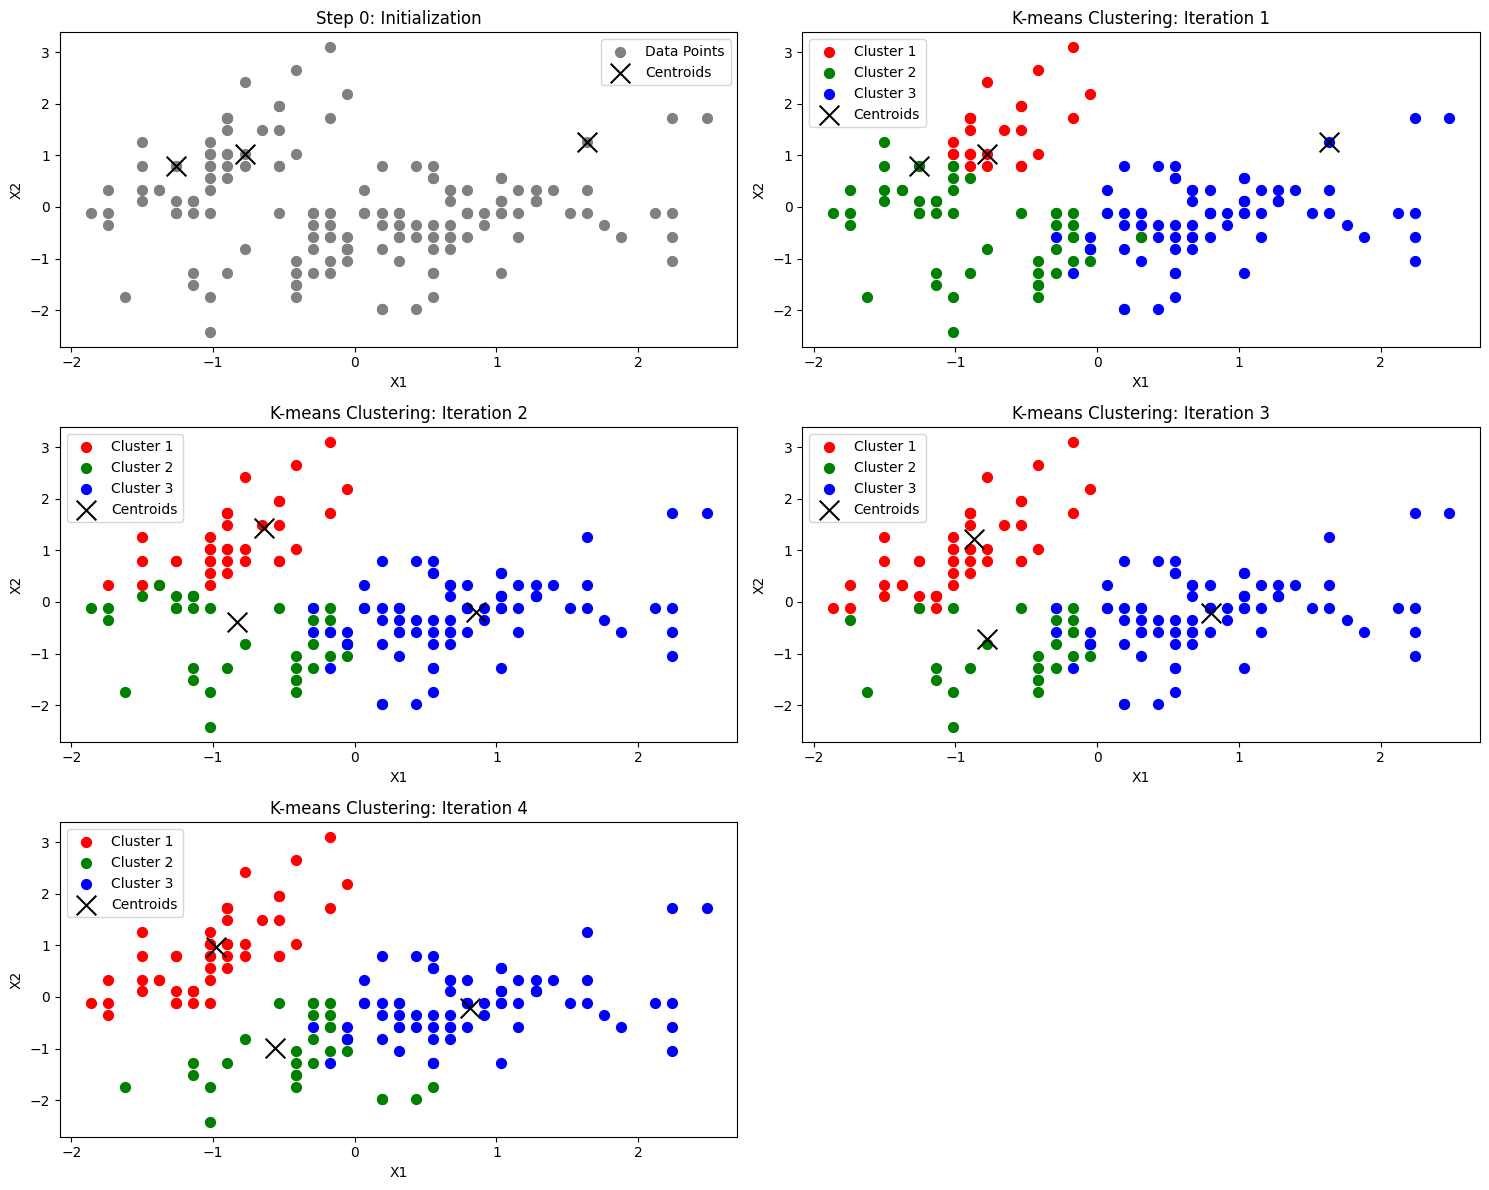

In [6]:
data = df_standardized.to_numpy()

# Plot 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot the initialization before clustering
ax = axes[0, 0]
ax.scatter(data[:, 0], data[:, 1], s=50, color='gray', label='Data Points')
ax.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='x', color='black', label='Centroids')
ax.set_title('Step 0: Initialization')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

# Plotting 4 iterations
for iteration in range(1, 5):
    clusters = nearest_clusters_assignment(data, centroids)

    ax = axes[(iteration) // 2, (iteration) % 2]
    colors = ['r', 'g', 'b']

    for k in range(K):
        points = data[clusters == k]
        ax.scatter(points[:, 0], points[:, 1], s=50, color=colors[k], label=f'Cluster {k + 1}')

    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='x', color='black', label='Centroids')
    ax.set_title(f'K-means Clustering: Iteration {iteration}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()

    new_centroids = update_centroids(data, clusters, K)
    centroids = new_centroids

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

**2. Implanting K-means++ clustering algorithm**

In [7]:
# Random seed
np.random.seed(123)

def initialize_centroids_kmeans_plus_plus(data, k):
    n = data.shape[0]
    centroids = []

    # First centroid Random
    first_centroid_idx = np.random.choice(n)
    centroids.append(data[first_centroid_idx])

    # Next centroids calculating distance
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(data - c, axis=1) ** 2 for c in centroids], axis=0)
        probabilities = distances / distances.sum()
        next_centroid_idx = np.random.choice(n, p=probabilities)
        centroids.append(data[next_centroid_idx])

    return np.array(centroids)

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def compute_new_centroids(data, labels, k):
    """Compute the new centroids based on cluster assignments."""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans_pp(data, k, iterations=4):
    """Perform K-means clustering for a fixed number of iterations."""
    centroids = initialize_centroids_kmeans_plus_plus(data, k)
    history = [centroids]

    for _ in range(iterations):
        labels = assign_clusters(data, centroids)
        centroids = compute_new_centroids(data, labels, k)
        history.append(centroids)

    return history, labels

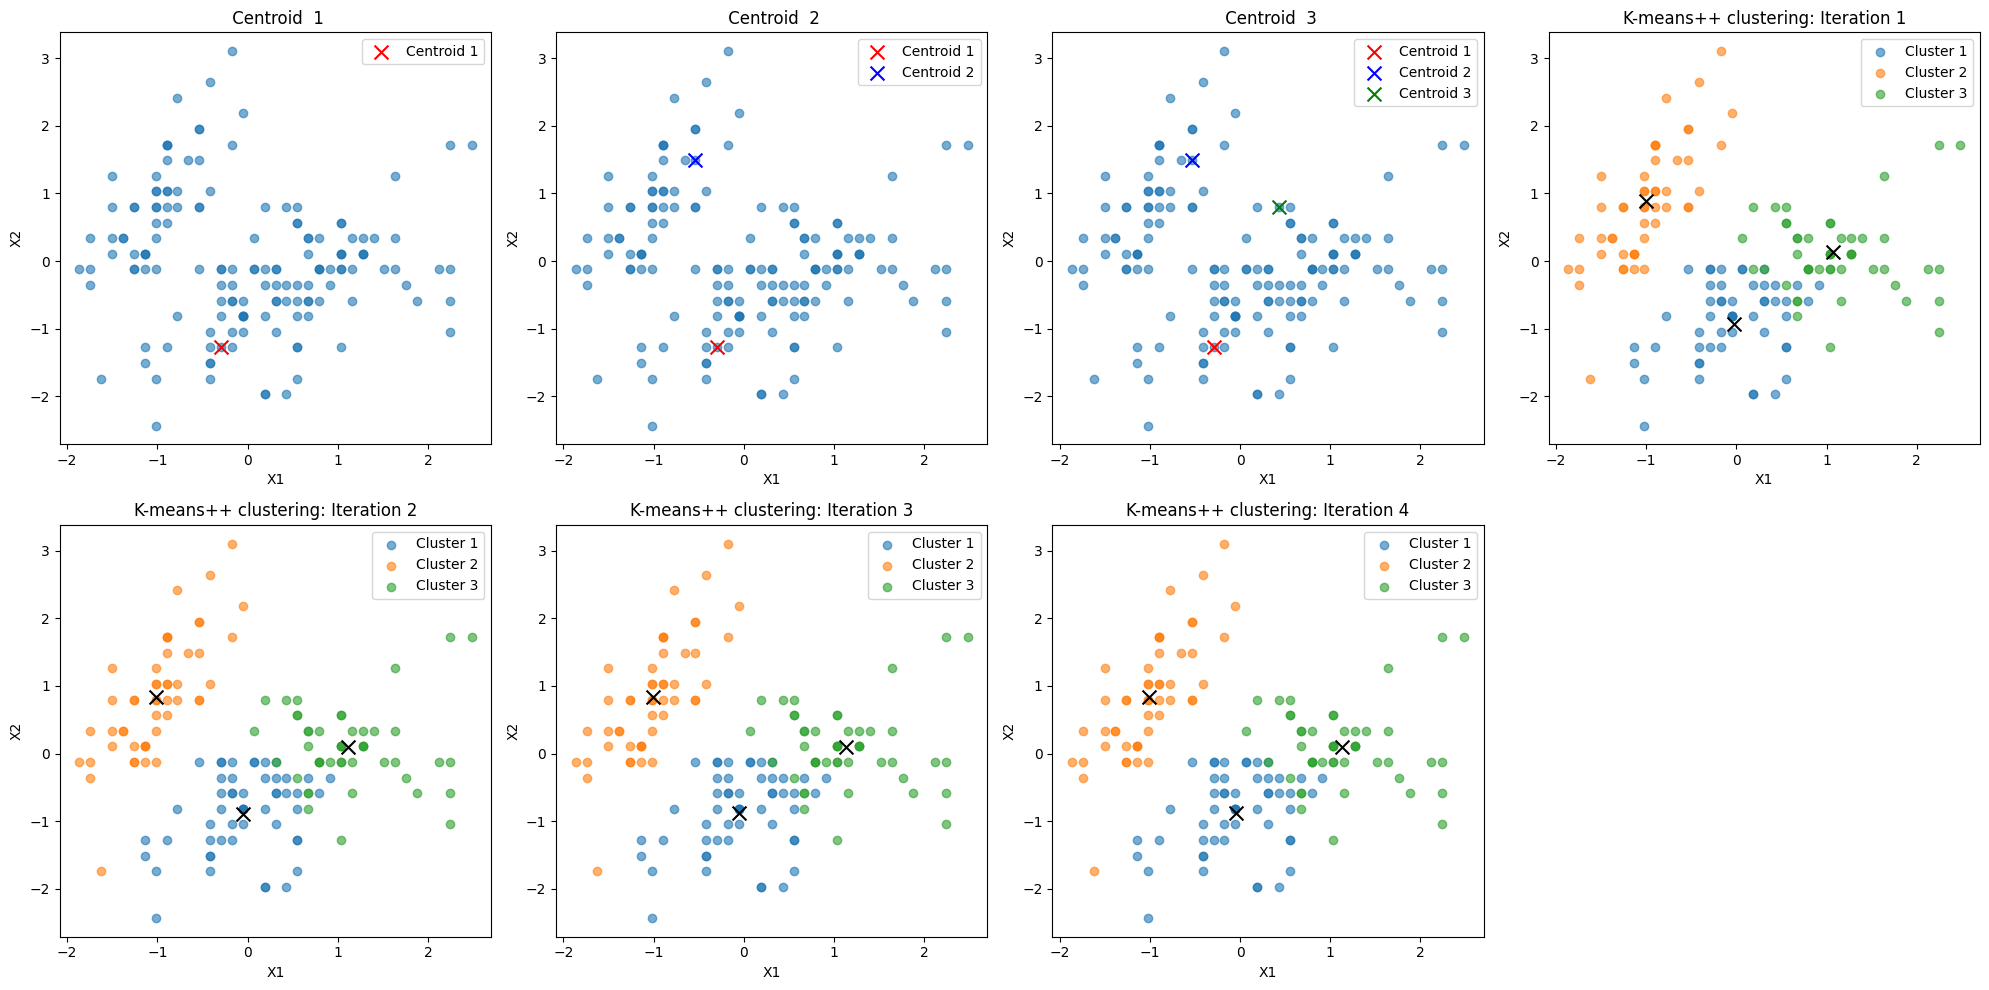

In [8]:
def plot_kmeans_pp_progress(data, history, k):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), squeeze=False)
    axes = axes.ravel()
    colors = ['red', 'blue', 'green']

    # Plotting K centroids
    for step in range(3):
        axes[step].scatter(data[:, 0], data[:, 1], alpha=0.6)
        for i in range(step + 1):
            axes[step].scatter(history[0][i][0], history[0][i][1],
                               c=colors[i], marker='x', s=100, label=f'Centroid {i + 1}')
        axes[step].set_title(f' Centroid  {step + 1}')
        axes[step].set_xlabel('X1')
        axes[step].set_ylabel('X2')
        axes[step].legend()

    # Iterations
    for i in range(4):
        centroids = history[i + 1]
        labels = assign_clusters(data, centroids)
        labels = np.array(labels)

        for j in range(k):
            cluster_data = data[labels == j]
            axes[i + 3].scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.6, label=f'Cluster {j + 1}')

        axes[i + 3].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
        axes[i + 3].set_title(f'K-means++ clustering: Iteration {i + 1}')
        axes[i + 3].set_xlabel('X1')
        axes[i + 3].set_ylabel('X2')
        axes[i + 3].legend()


    for ax in axes[len(history) + 2:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

k = 3
history, labels = kmeans_pp(data, k)
plot_kmeans_pp_progress(data, history, k)


**2. Implanting KNN classification**

In [9]:
# Load the dataset
knn_df = pd.read_csv('cluster_data2.csv')

# Z-score standardization
knn_df_standardized = (knn_df - knn_df.mean()) / knn_df.std()
knn_data = knn_df_standardized.values

k = 3  # Number of clusters
history, labels = kmeans_pp(knn_data, k)

knn_df_standardized['Class'] = labels

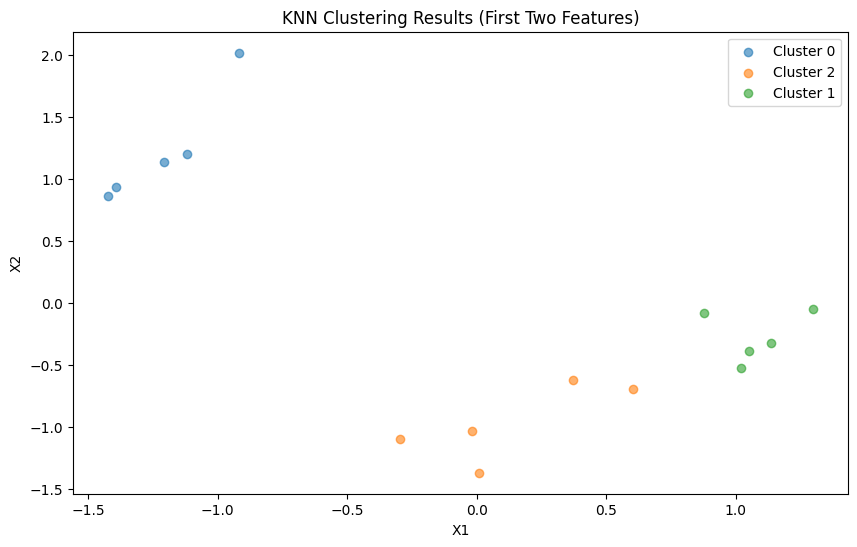

          X1        X2        X3        X4  Class  KNN_Class
0  -0.916327  2.019833 -1.320510 -1.245095      0          0
1  -1.118883  1.206478 -1.314864 -1.323843      0          0
2   0.009646 -1.369149  0.215317  0.093623      2          2
3  -0.294189 -1.098030  0.153206  0.041124      2          2
4   1.022428 -0.521903  1.005816  1.117348      1          1
5  -0.019291 -1.030251  0.288721  0.185496      2          2
6  -1.422718  0.867579 -1.303571 -1.284469      0          0
7   1.138174 -0.318564  0.983231  0.959852      1          1
8  -1.205693  1.138698 -1.247107 -1.218846      0          0
9   0.877745 -0.081336  0.887242  1.274844      1          1
10  0.371353 -0.623573  0.345185  0.237994      2          2
11  1.297326 -0.047446  1.050988  0.972977      1          1
12 -1.393781  0.935359 -1.292278 -1.192596      0          0
13  1.051364 -0.386344  1.135684  1.104224      1          1
14  0.602847 -0.691352  0.412942  0.277368      2          2


In [10]:
# KNN Implementation from Scratch
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(train_data, train_labels, test_point, k=3):
    distances = [
        (euclidean_distance(test_point, train_data[i]), train_labels[i])
        for i in range(len(train_data))
    ]
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    classes = [label for _, label in k_neighbors]
    return max(set(classes), key=classes.count)

new_labels = [
    knn_predict(knn_data, labels, point, k=3) for point in knn_data
]
knn_df_standardized['KNN_Class'] = new_labels

def plot_knn_clusters(df, class_column='KNN_Class'):
    plt.figure(figsize=(10, 6))

    for cluster in df[class_column].unique():
        cluster_data = df[df[class_column] == cluster]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', alpha=0.6)

    plt.title('KNN Clustering Results')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.legend()
    plt.show()

plot_knn_clusters(knn_df_standardized)

print(knn_df_standardized)
